# Intro
Car insurance is a policy purchased by vehicle owners to mitigate costs associated with getting into an auto accident. The global auto insurance market size was valued at $ 739.30 billion in 2019, and is projected to reach $ 1.06 trillion by 2027, growing at a CAGR of 8.5% from 2020 to 2027. Auto insurance provides financial protection to customers against physical damage, resulting from traffic collision and theft of vehicles. In addition, it covers the cost associated with injuries, death, or property damage caused by insured owner of the vehicle to another driver, vehicle, or property such as fence, building, or utility pole. Although auto insurance requirements vary from state to state, bodily injury liability and property damage liability coverage  has been mandated to in many jurisdictions before using or keeping a vehicle on public roads. The auto insurance market exhibits high growth potential, as the number of road accidents is increasing in most of the countries across the globe.


(https://www.investopedia.com/terms/a/auto-insurance.asp)
(https://www.alliedmarketresearch.com/auto-insurance-market)


# Problem
- to predict customers to join car insurance from a bank through telemarketing



# Goals
- Focus on targeting to sell Car Insurance using attributes that were known before the telemarketing was executed
- Find a solution for under a growing pressure to increase profits and reduce costs in Banks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Insurance.csv')
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [3]:
# Checking if there is any null values
df.isna().sum()

# We have missing values here in this dataset, so we'll handle this.

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [4]:
# Remove columns id and outcome since we don't need id columns, and outcome has more missing values than the non null

df.drop(['Id', 'Outcome'], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4000 non-null   int64 
 1   Job               3981 non-null   object
 2   Marital           4000 non-null   object
 3   Education         3831 non-null   object
 4   Default           4000 non-null   int64 
 5   Balance           4000 non-null   int64 
 6   HHInsurance       4000 non-null   int64 
 7   CarLoan           4000 non-null   int64 
 8   Communication     3098 non-null   object
 9   LastContactDay    4000 non-null   int64 
 10  LastContactMonth  4000 non-null   object
 11  NoOfContacts      4000 non-null   int64 
 12  DaysPassed        4000 non-null   int64 
 13  PrevAttempts      4000 non-null   int64 
 14  CallStart         4000 non-null   object
 15  CallEnd           4000 non-null   object
 16  CarInsurance      4000 non-null   int64 
dtypes: int64(10), 

In [6]:
# Statistics description of each features
df.describe()

# In this dataset, we have customers with age average of 41 years old, while the youngest is 18 years old and the eldest is 95 years old
# Most of customers don't have credit default
# Customers have an average of 1,534 in their balance
# 


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [7]:
# Statistics description of each features for object

df.describe(include = 'O')

# Most clients work as management role
# Clients are married in general and have been contacted via cellular in May

,Job,Marital,Education,Communication,LastContactMonth,CallStart,CallEnd
count,3981,4000,3831,3098,4000,4000,4000
unique,11,3,3,2,12,3777,3764
top,management,married,secondary,cellular,may,17:02:39,10:22:30
freq,893,2304,1988,2831,1049,3,3


In [8]:
# We will add missing values on categorical variables with the most frequent
print("number of NaN values for the column Job :", df['Job'].isnull().sum())
print("number of NaN values for the column Education :", df['Education'].isnull().sum())
print("number of NaN values for the column Communication :", df['Communication'].isnull().sum())

number of NaN values for the column Job : 19
number of NaN values for the column Education : 169
number of NaN values for the column Communication : 902


In [9]:
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [10]:
# Run check for missing values after handling missing value in categorical var with most frequent (modes)
df.isna().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [11]:
print("number of NaN values for the column Job :", df['Job'].isnull().sum())
print("number of NaN values for the column Education :", df['Education'].isnull().sum())
print("number of NaN values for the column Communication :", df['Communication'].isnull().sum())

# We don't have missing value

number of NaN values for the column Job : 0
number of NaN values for the column Education : 0
number of NaN values for the column Communication : 0


In [12]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
       round((((df[i].isna().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = dataDesc,
            columns=[
                'Data Features',
                'Data Type',
                'Null',
                'Null Percentage',
                'Unique',
                'Unique Sample'
            ])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,Age,int64,0,0.0,70,"[80, 57]"
1,Job,object,0,0.0,11,"[admin., blue-collar]"
2,Marital,object,0,0.0,3,"[married, single]"
3,Education,object,0,0.0,3,"[secondary, primary]"
4,Default,int64,0,0.0,2,"[0, 1]"
5,Balance,int64,0,0.0,2178,"[-271, 443]"
6,HHInsurance,int64,0,0.0,2,"[1, 0]"
7,CarLoan,int64,0,0.0,2,"[1, 0]"
8,Communication,object,0,0.0,2,"[telephone, cellular]"
9,LastContactDay,int64,0,0.0,31,"[29, 4]"


In [13]:
# Categorical and Numerical Variables

num_var = df._get_numeric_data().columns
cat_var= list(set(df.columns) - set(num_var))
print(num_var)
print(cat_var)

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance'],
      dtype='object')
['Job', 'Education', 'CallStart', 'Marital', 'Communication', 'LastContactMonth', 'CallEnd']


# Univariate Analysis

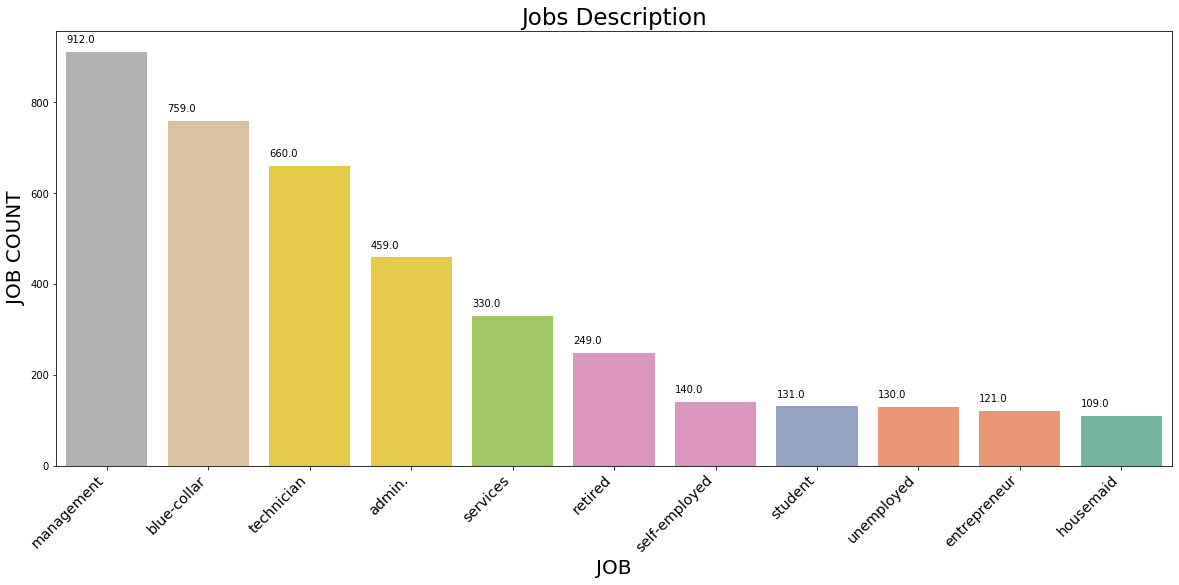

In [14]:
# Job Variables
# Job of the clients


plt.figure(figsize=(20,8))
data_job = df['Job'].value_counts().nlargest(15).astype(int)
ax = sns.barplot(data_job.index, data_job.values,palette= 'Set2_r')


plt.title('Jobs Description',fontsize=23)
plt.xlabel('JOB',fontsize = 20)
plt.ylabel('JOB COUNT',fontsize = 20)


plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x(), p.get_height()+20)) 

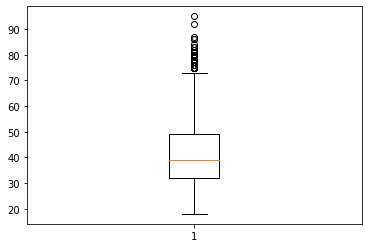

In [15]:
# Age

plt.boxplot(df['Age'])
plt.show()

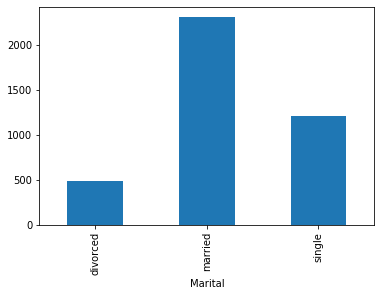

In [16]:
# Marital status
df.groupby('Marital').size().plot(kind='bar')

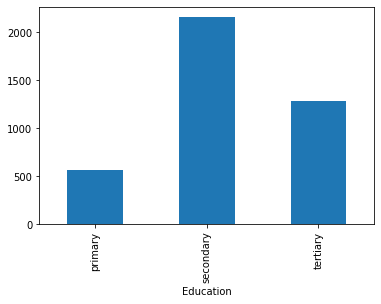

In [17]:
# Education

df.groupby('Education').size().plot(kind='bar')

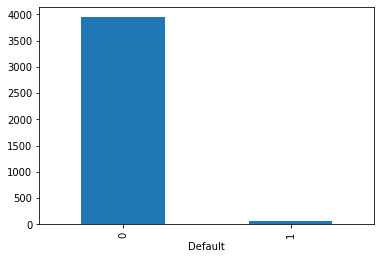

In [18]:
# Default

df.groupby('Default').size().plot(kind='bar')

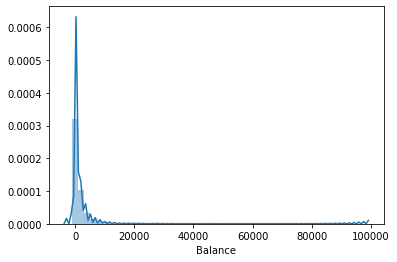

In [19]:
# Balance
sns.distplot(df['Balance'])

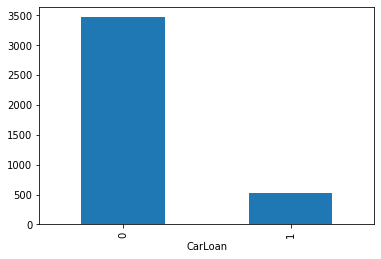

In [20]:
# Car Loan

df.groupby('CarLoan').size().plot(kind='bar')


# Only few clients who has car loan

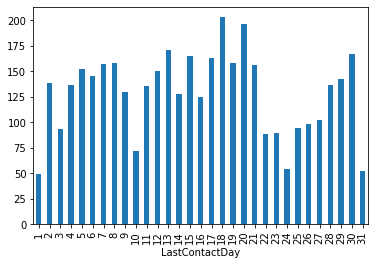

In [21]:
# last contact day = Day

df.groupby('LastContactDay').size().plot(kind='bar')

# Bank only contact few customers on day 1, 10, 24, and 31

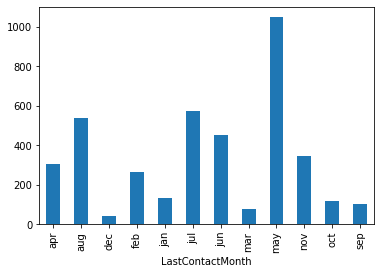

In [22]:
# month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

df.groupby('LastContactMonth').size().plot(kind='bar')

# Bank busiest month to contact customer is in May


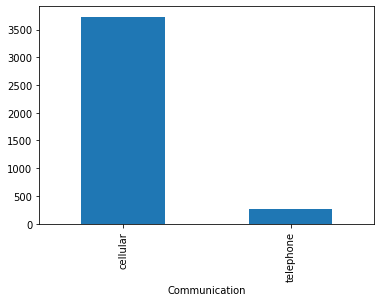

In [23]:
# Communication
df.groupby('Communication').size().plot(kind='bar')

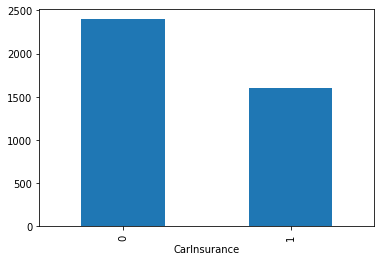

In [24]:
# Car Insurance
df.groupby('CarInsurance').size().plot(kind='bar')

# We have potential customers because we have more individuals who has not a car insurance

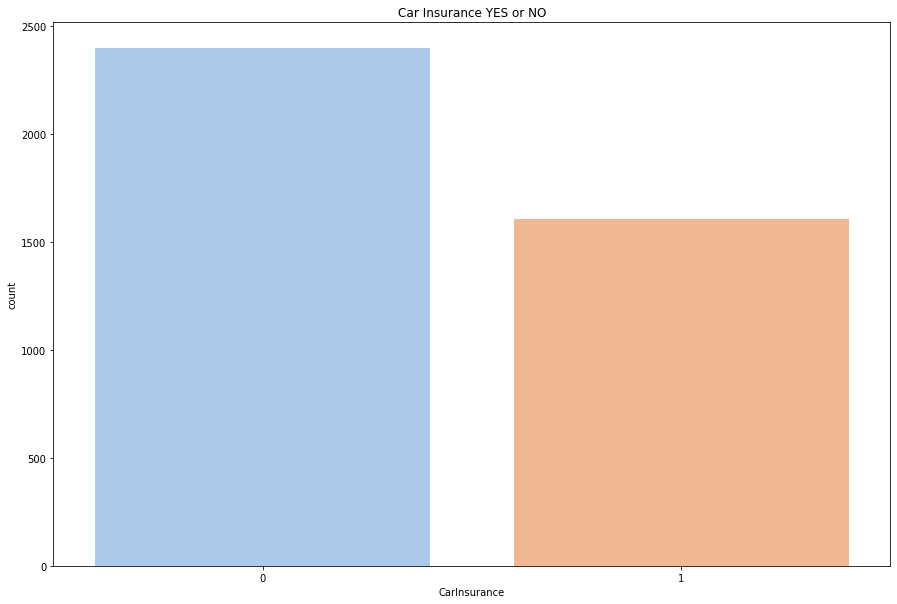

In [25]:
plt.figure(figsize = (15,10))
sns.countplot(df['CarInsurance'], palette = 'pastel')
plt.title('Car Insurance YES or NO')
plt.show()

# Most clients don't have car insurance

# Multivariate Analysis


In [26]:
# Education, Balance, Car Insurance

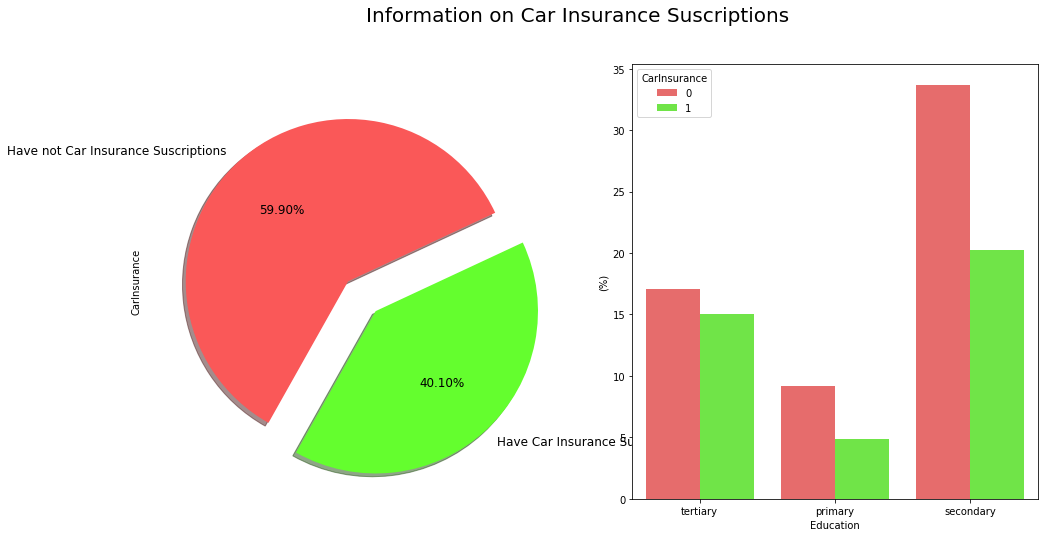

In [28]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Have not Car Insurance Suscriptions", "Have Car Insurance Suscriptions"

plt.suptitle('Information on Car Insurance Suscriptions', fontsize=20)

df["CarInsurance"].value_counts().plot.pie(explode=[0,0.25], 
                                        autopct='%1.2f%%', 
                                        ax=ax[0], 
                                        shadow=True, 
                                        colors=colors, 
                                        labels=labels, 
                                        fontsize=12, 
                                        startangle=25)


sns.barplot(x="Education", y="Balance", hue="CarInsurance", data=df, palette=colors, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["Education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()


# As we see below, almost 60% customers have not secured their car, so we have 60% potential customers
# Based on their education, Customers with secondary education has the highest result on how they already have car insurance and not.


In [ ]:
# Job and Car Insurance

In [29]:
pd.crosstab(index = df['Job'], columns = df['CarInsurance'], normalize = 'columns')

CarInsurance,0,1
Job,,
admin.,0.114357,0.115337
blue-collar,0.225376,0.136534
entrepreneur,0.035893,0.021820
housemaid,0.030050,0.023067
management,0.213272,0.250000
retired,0.042988,0.091022
self-employed,0.035893,0.033666
services,0.090985,0.069825
student,0.018364,0.054239


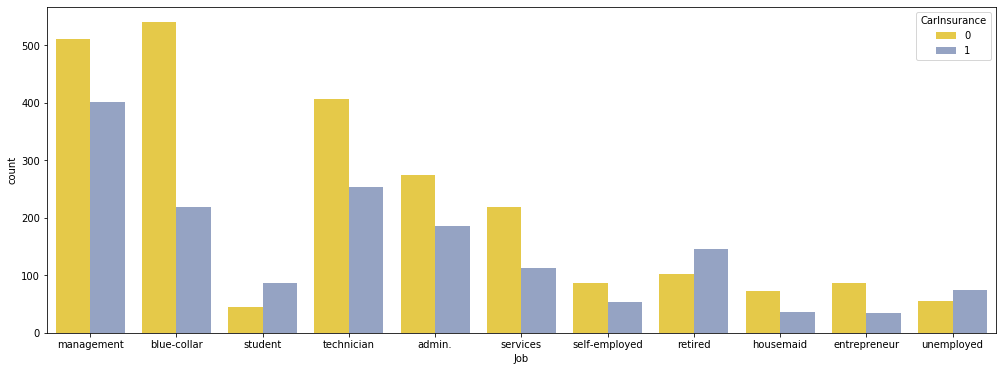

In [30]:
plt.figure(figsize = (17, 6))
sns.countplot('Job', hue = 'CarInsurance', data = df , palette= 'Set2_r')

# group of customers who subscribed and therefore are most likely to subscribe to the Car Insurance. Regarding their characteristics, one observes that this cluster is made of persons in managerial positions.
# Clients who already have car insurance is having a management job, then technician and the least housemaid and entrepreneur
# However, blue-collar, management, technician and admin are the potential market for the company to execute their marketing

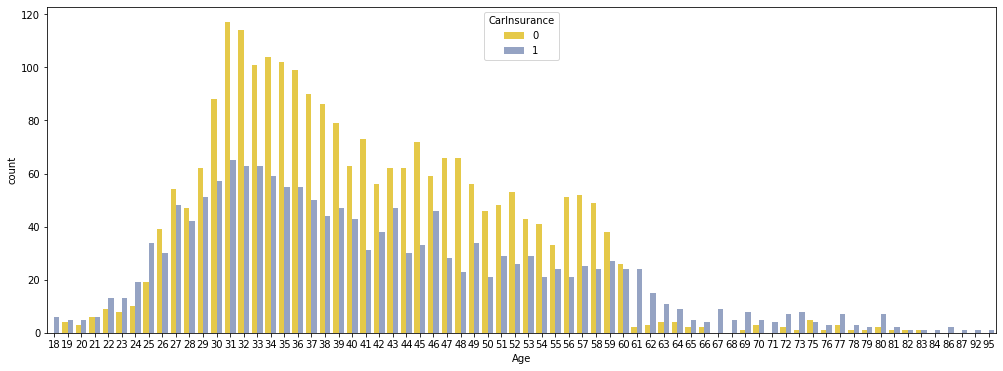

In [31]:
# Age and Car Insurance

plt.figure(figsize = (17, 6))
sns.countplot('Age', hue = 'CarInsurance', data = df , palette= 'Set2_r')

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,age_group
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0,Mid-Age
1,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,14:49:03,14:52:08,0,Mid-Age
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1,Young
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1,Young
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,14:35:44,14:38:56,0,Mid-Age


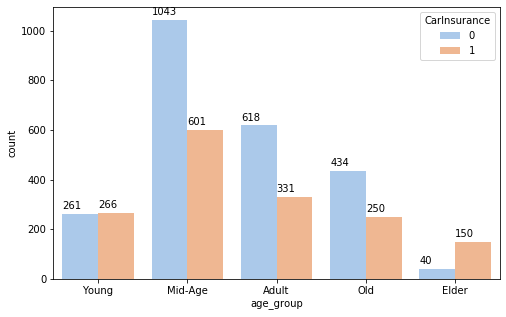

In [36]:
plt.figure(figsize=(8,5))
df["age_group"]=pd.cut(df.Age, bins = [18,29,40,50,60,100], labels = ['Young','Mid-Age','Adult',"Old",'Elder'])
a= sns.countplot(x="age_group", data=df, hue="CarInsurance", palette="pastel")
for i in a.patches:
    a.annotate((i.get_height()),(i.get_x(), i.get_height()+20)) 
df.head()    


# Group age of Mid-Age clients has more than 1000 result that has a car insurance

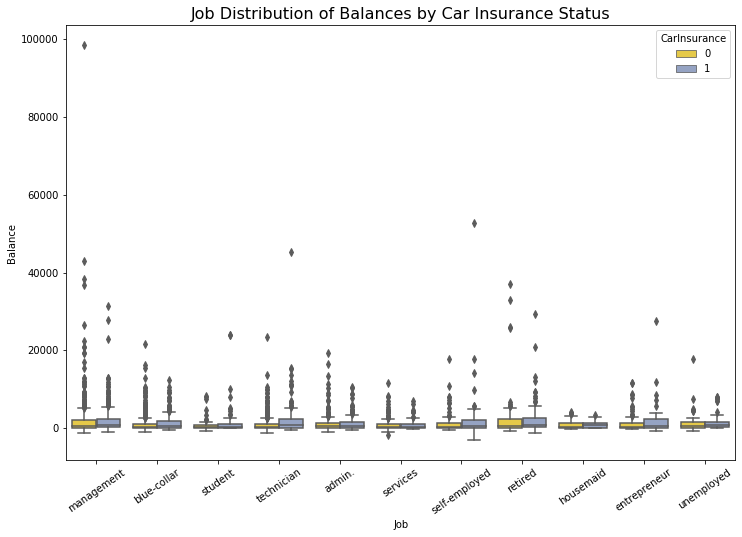

In [32]:
fig = plt.figure(figsize=(12,8))

a= sns.boxplot(y="Balance", x="Job", hue="CarInsurance", palette="Set2_r",
            data=df);
plt.xticks(rotation=35)
plt.title("Job Distribution of Balances by Car Insurance Status", fontsize=16)
plt.show()



# Management and Retirees are the ones who have the highest balance in their accounts

In [ ]:
# MArital and Car Insurance

In [33]:
pd.crosstab(index = df['Marital'], columns = df['CarInsurance'])

# Married status has the most result on insuring their car

CarInsurance,0,1
Marital,,
divorced,273,210
married,1471,833
single,652,561


In [ ]:
# Default and Car Insurance

In [34]:
pd.crosstab(index = df['Default'], columns = df['CarInsurance'])

# There is 1590 customer that has car insurance and no credit defaultd 

CarInsurance,0,1
Default,,
0,2352,1590
1,44,14


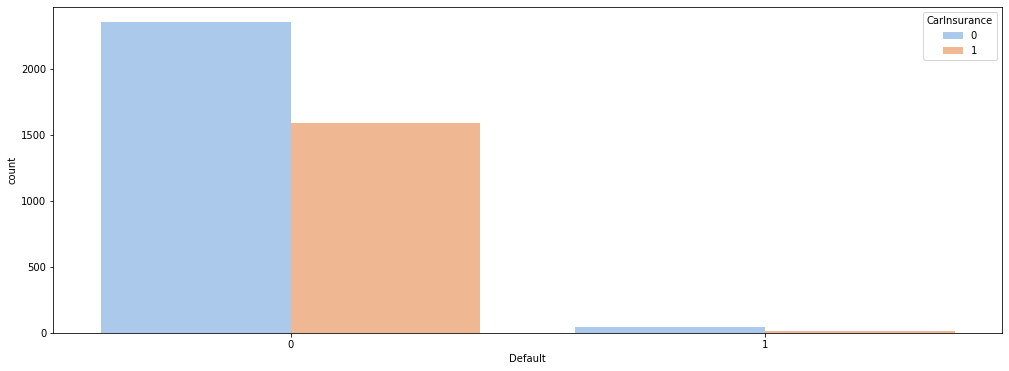

In [38]:
plt.figure(figsize = (17, 6))
sns.countplot('Default', hue = 'CarInsurance', data = df , palette= 'pastel')

In [37]:
# LastContactMonth

pd.crosstab(index = df['LastContactMonth'], columns = df['CarInsurance'])

CarInsurance,0,1
LastContactMonth,,
apr,150,156
aug,342,194
dec,7,34
feb,129,133
jan,86,48
jul,364,209
jun,283,171
mar,15,64
may,760,289


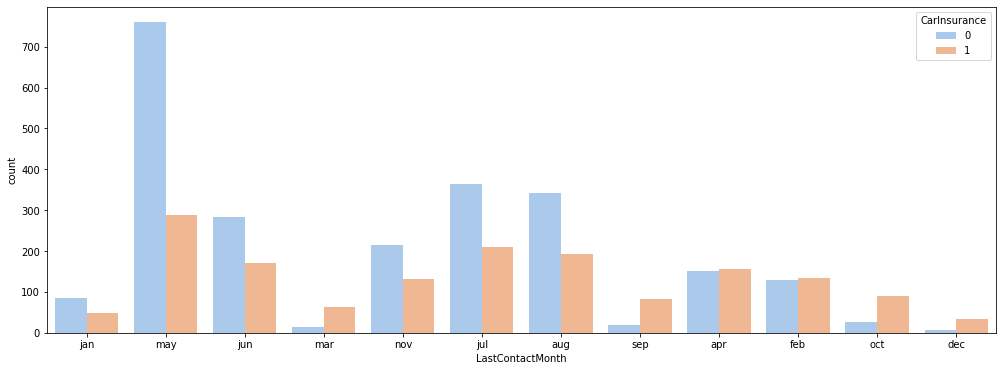

In [39]:
plt.figure(figsize = (17, 6))
sns.countplot('LastContactMonth', hue = 'CarInsurance', data = df , palette= 'pastel')

# Bank rushes to contact clients in May which leads to a successful closing the sales, but also facing other unsuccessful
# Bank could push clients a little more in February and April where there's a little gap.

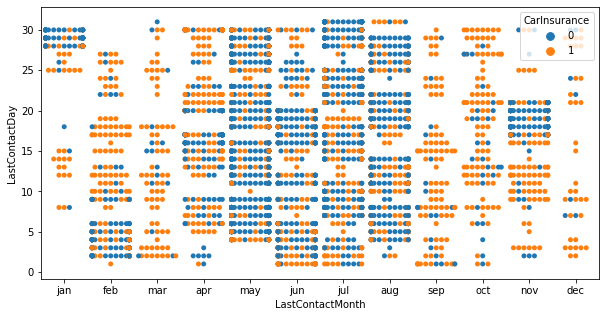

In [40]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="LastContactMonth",y="LastContactDay",hue="CarInsurance",data=df,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

# Conclusion EDA

1. In this dataset, we have customers with `age average of 41 years old`, while `the youngest is 18 years old` and `the eldest is 95 years old`. Most of customers don't have credit default. Customers have an average of 1,534 in their balance
2. Almost 60% customers have not secured their car, so we have 60% potential customers. Furthermore, based on their education, Customers with secondary education has the highest result on how they already have car insurance and not.
3. Group of customers who subscribed and therefore are most likely to subscribe to the Car Insurance. Regarding their characteristics, one observes that this cluster is made of persons in managerial positions. Clients who already have car insurance is having a management job, then technician and the least housemaid and entrepreneur. However, blue-collar, management, technician and admin are the potential market for the company to execute the marketing strategy.
4. There is 1590 customer that has car insurance and no credit default
5. Bank rushes to contact clients in May which leads to a successful closing the sales, but also facing other unsuccessful. Moreover, they could push clients a little more in February and April where there's a little gap between those who interested and not interested in joinning car insurance.
6. Married status has the most result on insuring their car

# Recommendation
- Bank should pursue potential customers with specific criterias such as, adult age (25 and more), secondary education, managerial position and married status

